   CONTACT_ID  AGE  FAMILYSIZE  YEAREXPERIENCE  ANNUALINCOME   
0         395   28           4               4            49  \
1         396   48           3              22            34   
2         397   42           1              18            11   
3         398   38           1              12           100   
4         399   38           4              11            45   

   EDUCATIONLEVEL_ID  NETPRICE_PRO11_AMT  NETPRICE_PRO12_AMT   
0                  1                 0.0                 1.0  \
1                  1                 0.0                 1.0   
2                  1                 0.0                 0.0   
3                  2                 0.0                 0.0   
4                  2                 0.0                 0.0   

   NETPRICE_PRO13_AMT  NETPRICE_PRO14_AMT  NETPRICE_PRO15_AMT   
0                 0.0                16.0                 0.0  \
1                 0.0                15.0                 0.0   
2                 0.0              

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

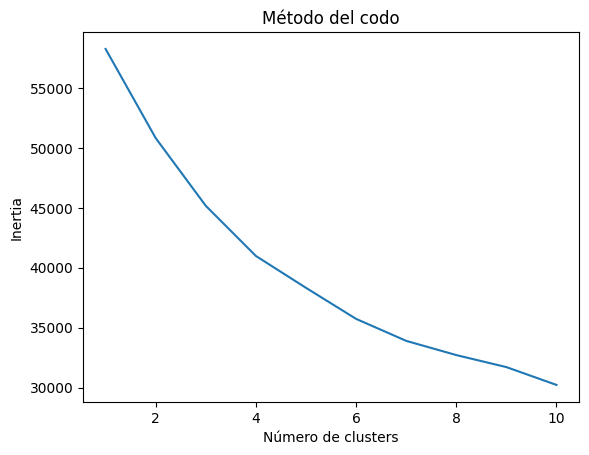

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


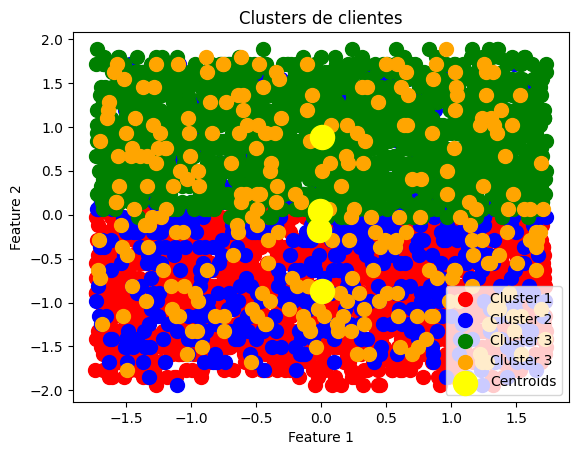

In [2]:
# Paso 1: Comprensión del negocio / entendimiento del problema

# En este ejemplo, consideraremos un conjunto de datos de clientes de un centro comercial y usaremos la clusterización para segmentar a los clientes en grupos con características similares.

# Paso 2: Comprensión de los datos

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar datos
data = pd.read_csv('data/customer-entrenamiento.csv')

# Visualizar primeras filas de datos
print(data.head())

# Obtener información sobre los datos
print(data.info())

# Descripción estadística de los datos
print(data.describe())

# Paso 3: Preparación de los datos

# Verificar y manejar valores nulos, datos faltantes, etc.

# Normalizar los datos si es necesario
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Paso 4: Modelado

# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

# Basándonos en el método del codo, elegimos el número óptimo de clusters (p.ej. k=3)

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Paso 5: Evaluación

# No hay métricas de evaluación objetivas en clusterización, pero podemos realizar análisis visual y subjetivo para interpretar los resultados.

# Visualizar los clusters
plt.scatter(scaled_data[clusters == 0, 0], scaled_data[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data[clusters == 1, 0], scaled_data[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data[clusters == 2, 0], scaled_data[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_data[clusters == 3, 0], scaled_data[clusters == 3, 1], s=100, c='orange', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de clientes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Paso 6: Despliegue

# Los resultados pueden ser utilizados para la segmentación de clientes y tomar decisiones de negocio, por ejemplo, dirigir estrategias de marketing específicas a cada segmento.

# Paso 7: Monitoreo y mantenimiento

# Los modelos de clusterización pueden necesitar actualizaciones periódicas, especialmente si los datos cambian significativamente con el tiempo.

